# reading seen and unseen uniprot

In [ ]:
import os

txt_path = "./final_plot/unseen_uniprot.txt"

unseen_uniprot = set()
with open(txt_path, "r") as f:
    for line in f:
        unseen_uniprot.add(line.strip())


# Gen data

In [ ]:
import os
import pandas as pd

docking = "gen"
data_path = f"./results/archive_250218_repeat/Strain_{docking}"
protocol = "De_novo_Results"
round_list = ["Round1", "Round2", "Round3"]

TASK_LIST = [
    # "all_active_molecules_new_20241120",
    'MolCraft_generated_molecules',
    'DecompDiff_generated_molecules',
    'FLAG_generated_molecules',
    # 'PGMG_generated_molecules',
    'PocketFlow_generated_molecules',
    'SurfGen_generated_molecules',
    'TargetDiff_generated_molecules',
    # 'TamGen_generated_molecules',
    "Pocket2Mol_generated_molecules",
    "diffSBDD_cond_crossdocked_generated_molecules",
    "diffSBDD_cond_moad_generated_molecules",
]

NAME_MAPPING = {
    # "all_active_molecules_new_20241120": Active
    'MolCraft_generated_molecules': "MolCraft",
    'DecompDiff_generated_molecules': "DecompDiff",
    'FLAG_generated_molecules': "FLAG",
    # 'PGMG_generated_molecules': PGMG,
    'PocketFlow_generated_molecules': "PocketFlow",
    'SurfGen_generated_molecules': "SurfGen",
    'TargetDiff_generated_molecules': "TargetDiff",
    # 'TamGen_generated_molecules': TamGen,
    "Pocket2Mol_generated_molecules": "Pocket2Mol",
    "diffSBDD_cond_crossdocked_generated_molecules": "DiffSBDD-C",
    "diffSBDD_cond_moad_generated_molecules": "DiffSBDD-M",
}

df_all = []

for round_name in round_list:
    for uniprot in os.listdir(data_path):
        uniprot_path = os.path.join(data_path, uniprot, round_name, protocol)
        for task in TASK_LIST:
            csv_file = os.path.join(uniprot_path, task, f"strain_{docking}.csv")
            if os.path.exists(csv_file):
                df = pd.read_csv(csv_file).dropna(subset=["strain_energy"])
                df["Models"] = task
                df["Round"] = round_name
                df["Uniprot"] = uniprot
                df_all.append(df)

df_all = pd.concat(df_all, ignore_index=True)
df_all["Models"] = df_all["Models"].map(NAME_MAPPING)
df_all.to_csv("./final_plot/Strain/Denovo/strain_gen_all.csv", index=False)


## split into seen and unseen

In [ ]:
import os
import pandas as pd


csv_all = "./final_plot/Strain/Denovo/strain_gen_all.csv"

# 把df_all中Uniprot拆为seen和unseen两个df
df_all = pd.read_csv(csv_all)
df_seen = df_all[~df_all["Uniprot"].isin(unseen_uniprot)]
df_unseen = df_all[df_all["Uniprot"].isin(unseen_uniprot)]
df_seen.to_csv("./final_plot/Strain/Denovo/strain_gen_seen.csv", index=False)
df_unseen.to_csv("./final_plot/Strain/Denovo/strain_gen_unseen.csv", index=False)

# Vina data

In [ ]:
import os
import pandas as pd

docking = "vina"
data_path = f"/home/fanzhehuan/myprojects/SBDDBench/results/archive_250218_repeat/Strain_dock_{docking}"
protocol = "De_novo_Results"
round_list = ["Round1", "Round2", "Round3"]

TASK_LIST = [
    # "all_active_molecules_new_20241120",
    'MolCraft_generated_molecules',
    'DecompDiff_generated_molecules',
    'FLAG_generated_molecules',
    # 'PGMG_generated_molecules',
    'PocketFlow_generated_molecules',
    'SurfGen_generated_molecules',
    'TargetDiff_generated_molecules',
    # 'TamGen_generated_molecules',
    "Pocket2Mol_generated_molecules",
    "diffSBDD_cond_crossdocked_generated_molecules",
    "diffSBDD_cond_moad_generated_molecules",
]

NAME_MAPPING = {
    # "all_active_molecules_new_20241120": Active
    'MolCraft_generated_molecules': "MolCraft",
    'DecompDiff_generated_molecules': "DecompDiff",
    'FLAG_generated_molecules': "FLAG",
    # 'PGMG_generated_molecules': PGMG,
    'PocketFlow_generated_molecules': "PocketFlow",
    'SurfGen_generated_molecules': "SurfGen",
    'TargetDiff_generated_molecules': "TargetDiff",
    # 'TamGen_generated_molecules': TamGen,
    "Pocket2Mol_generated_molecules": "Pocket2Mol",
    "diffSBDD_cond_crossdocked_generated_molecules": "diffSBDD(CrossDock)",
    "diffSBDD_cond_moad_generated_molecules": "diffSBDD(MOAD)",
}

df_all = []

for round_name in round_list:
    for uniprot in os.listdir(data_path):
        uniprot_path = os.path.join(data_path, uniprot, round_name, protocol)
        for task in TASK_LIST:
            csv_file = os.path.join(uniprot_path, task, f"strain_{docking}.csv")
            if os.path.exists(csv_file):
                df = pd.read_csv(csv_file).dropna(subset=["strain_energy"])
                df["Models"] = task
                df["Round"] = round_name
                df["Uniprot"] = uniprot
                df_all.append(df)

df_all = pd.concat(df_all, ignore_index=True)
df_all["Models"] = df_all["Models"].map(NAME_MAPPING)
df_all.to_csv(f"./final_plot/Strain/Denovo/strain_{docking}_all.csv", index=False)


## 拆分为seen和unseen

In [ ]:
import os
import pandas as pd

docking = "vina"
csv_all = f"./final_plot/Strain/Denovo/strain_{docking}_all.csv"

df_all = pd.read_csv(csv_all)
df_seen = df_all[~df_all["Uniprot"].isin(unseen_uniprot)]
df_unseen = df_all[df_all["Uniprot"].isin(unseen_uniprot)]
df_seen.to_csv(f"./final_plot/Strain/Denovo/strain_{docking}_seen.csv", index=False)
df_unseen.to_csv(f"./final_plot/Strain/Denovo/strain_{docking}_unseen.csv", index=False)




# plot

## all

/tmp/ipykernel_1670809/1046314793.py:140: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


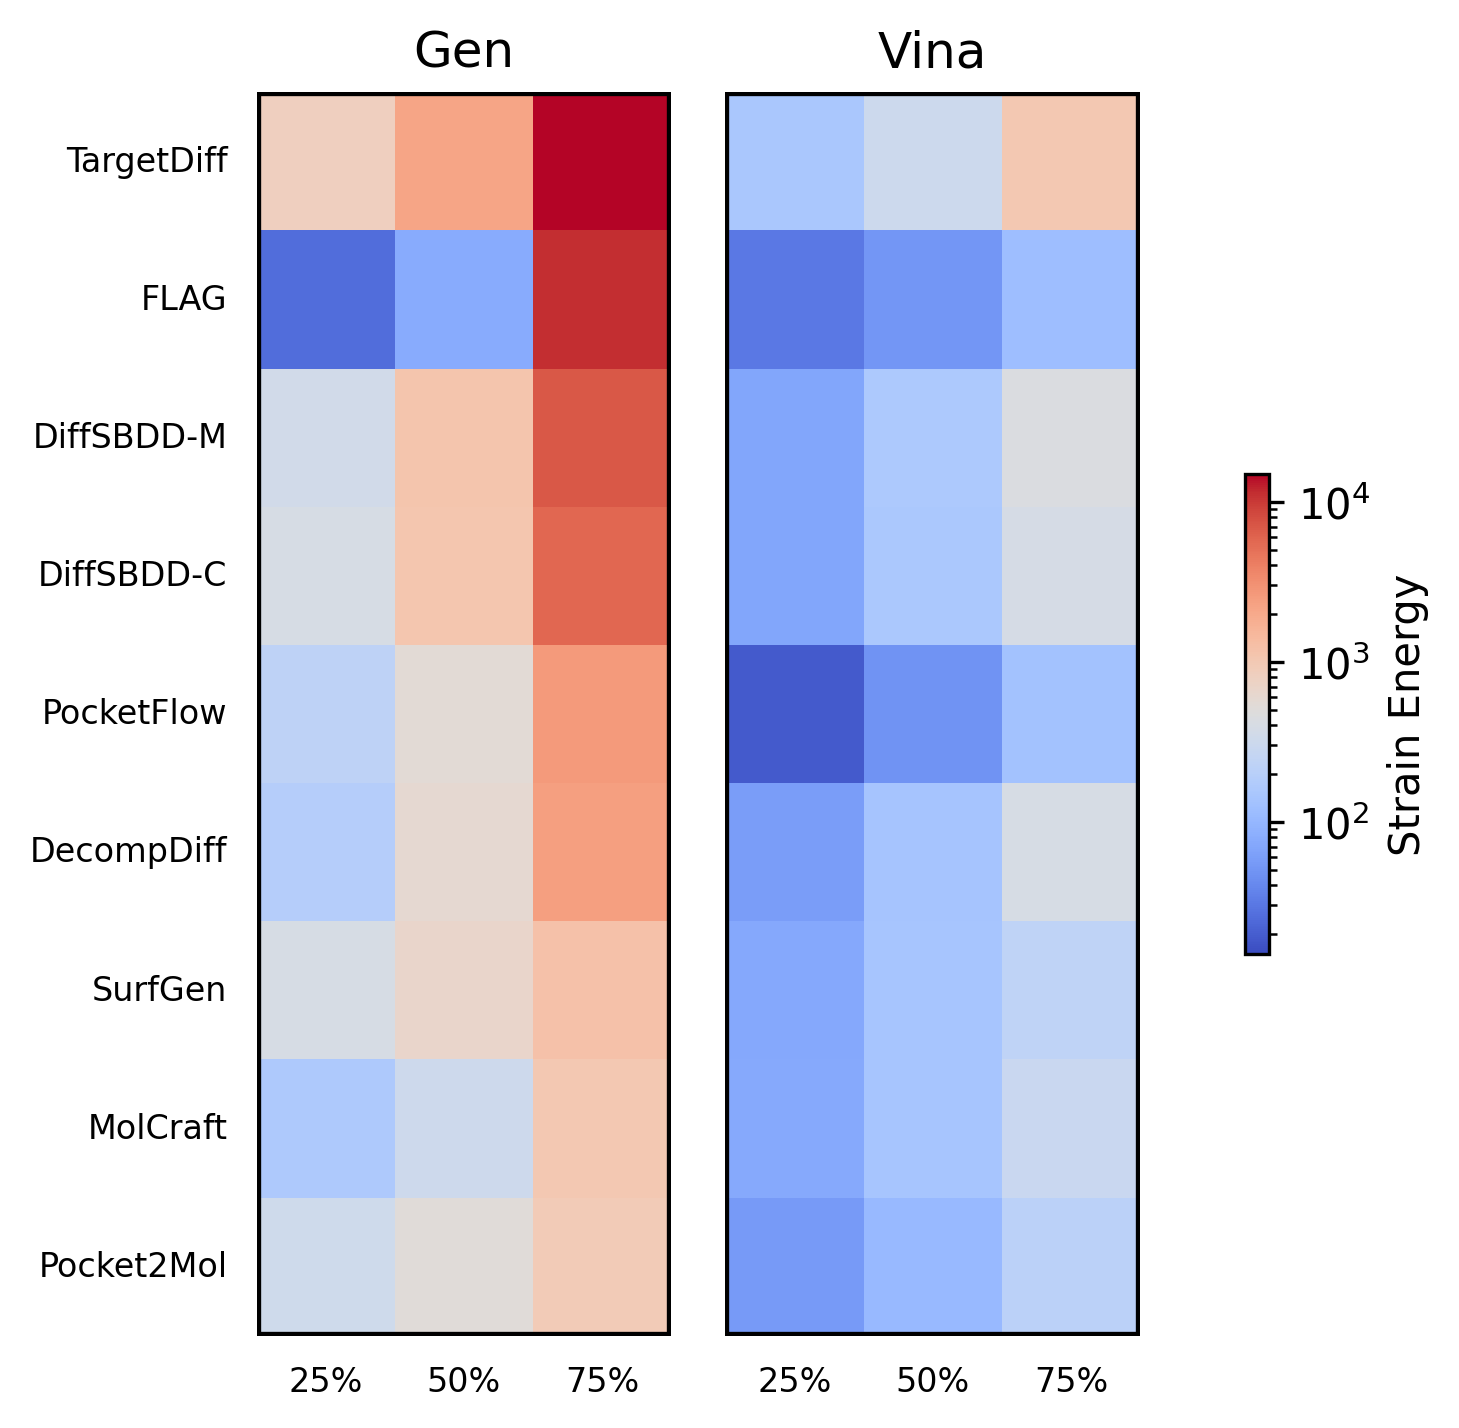

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import LogNorm

result_df = pd.read_csv("./final_plot/Strain/Denovo/strain_all_summary.csv")

result_df.sort_values("gen_mean_75", ascending=False, inplace=True)

heatmap_data_gen = []
heatmap_data_vina = []
heatmap_data_all = []

for metric in ["25", "50", "75"]:
    for condition in ["gen_mean", "vina_mean"]:
        col_name = f"{condition}_{metric}"
        values = result_df[col_name].tolist()
        if condition == "gen_mean":
            heatmap_data_gen.append(values)
        elif condition == "vina_mean":
            heatmap_data_vina.append(values)
        heatmap_data_all.append(values)

xticklabels_with_gaps = [
    "25%", "50%", "75%",
]

def add_gaps(heatmap_data):
    heatmap_data_with_gaps = []
    for i in range(0, len(heatmap_data), 3):
        heatmap_data_with_gaps.append(heatmap_data[i])     # 25
        heatmap_data_with_gaps.append(heatmap_data[i+1])   # 50
        heatmap_data_with_gaps.append(heatmap_data[i+2])   # 75
    return np.array(heatmap_data_with_gaps).T 

heatmap_data_gen_with_gaps = add_gaps(heatmap_data_gen)
heatmap_data_vina_with_gaps = add_gaps(heatmap_data_vina)


fig, axes = plt.subplots(1, 2, figsize=(4, 5), dpi=300)

norm = LogNorm(vmin=15, 
               vmax=15000)

# gen
sns.heatmap(
    heatmap_data_gen_with_gaps,
    cmap="coolwarm", 
    xticklabels=xticklabels_with_gaps,
    yticklabels=result_df["Models"],
    cbar=False,  
    square=True,
    ax=axes[0],
    norm=norm
)
axes[0].set_title("Gen")
axes[0].add_patch(
    patches.Rectangle(
        (0, 0), 3, len(result_df), 
        transform=axes[0].transData, 
        color="black", fill=False, linewidth=2 
    )
)

# vina
sns.heatmap(
    heatmap_data_vina_with_gaps,
    cmap="coolwarm", 
    xticklabels=xticklabels_with_gaps,
    yticklabels=[],
    cbar=False,  
    square=True,
    ax=axes[1],
    norm=norm
)
axes[1].set_title("Vina")

axes[1].add_patch(
    patches.Rectangle(
        (0, 0), 3, len(result_df),  
        transform=axes[1].transData, 
        color="black", fill=False, linewidth=2  
    )
)

cbar = fig.colorbar(axes[0].collections[0], ax=axes, orientation='vertical', fraction=0.03, pad=0.08)
cbar.set_label("Strain Energy")

cbar.ax.set_position([1.05, 0.15, 0.02, 0.7]) 
for ax in axes:
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params(left=False, bottom=False)


for ax in axes:
    plt.sca(ax)  
    plt.yticks(fontsize=8)  
    plt.xticks(fontsize=8)  

plt.tight_layout()
plt.savefig("./final_plot/output/06-strain_heatmap_denovo_all_vina.svg", bbox_inches='tight', format='svg')
plt.show()


## seen

/tmp/ipykernel_1670809/305068794.py:140: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


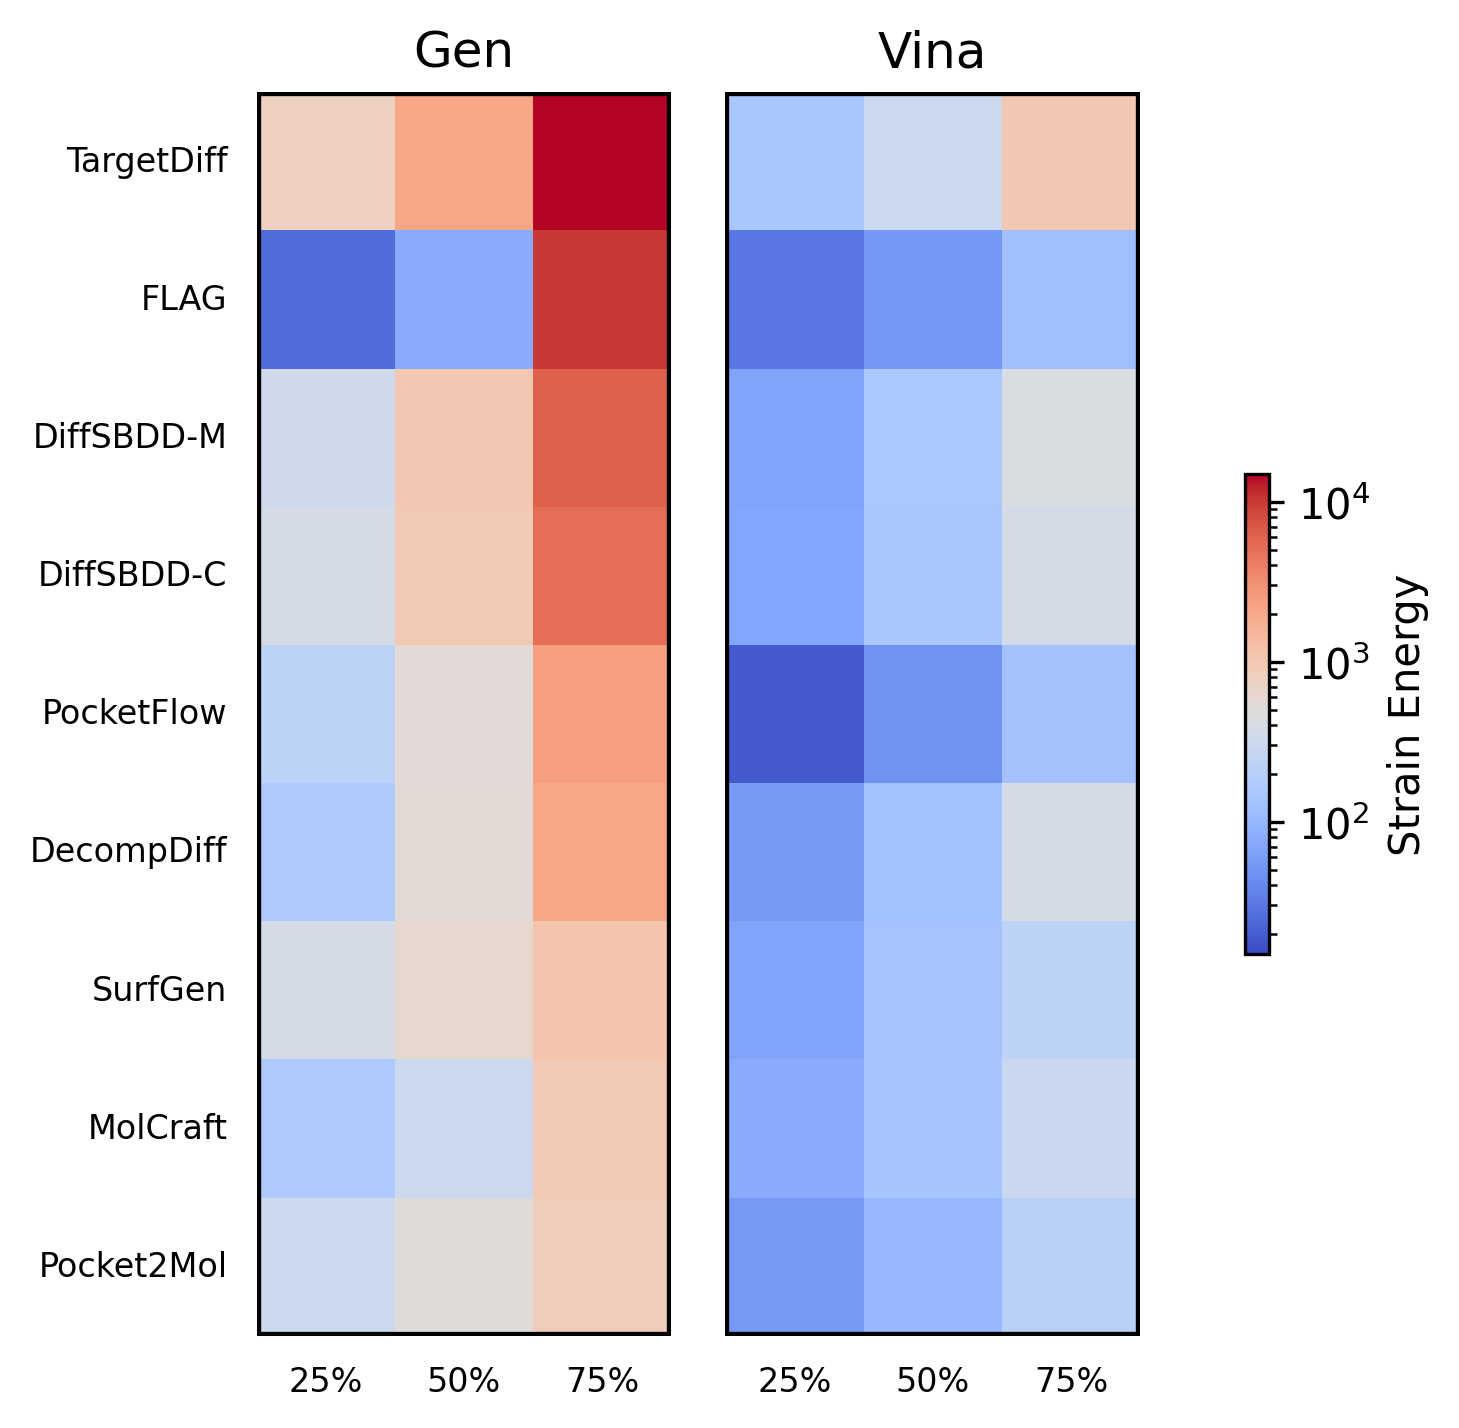

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import LogNorm

result_df = pd.read_csv("./final_plot/Strain/Denovo/strain_seen_summary.csv")

result_df.sort_values("gen_mean_75", ascending=False, inplace=True)

heatmap_data_gen = []
heatmap_data_vina = []
heatmap_data_all = []

for metric in ["25", "50", "75"]:
    for condition in ["gen_mean", "vina_mean"]:
        col_name = f"{condition}_{metric}"
        values = result_df[col_name].tolist()
        if condition == "gen_mean":
            heatmap_data_gen.append(values)
        elif condition == "vina_mean":
            heatmap_data_vina.append(values)
        heatmap_data_all.append(values)

xticklabels_with_gaps = [
    "25%", "50%", "75%",
]

def add_gaps(heatmap_data):
    heatmap_data_with_gaps = []
    for i in range(0, len(heatmap_data), 3):
        heatmap_data_with_gaps.append(heatmap_data[i])     # 25
        heatmap_data_with_gaps.append(heatmap_data[i+1])   # 50
        heatmap_data_with_gaps.append(heatmap_data[i+2])   # 75
    return np.array(heatmap_data_with_gaps).T 

heatmap_data_gen_with_gaps = add_gaps(heatmap_data_gen)
heatmap_data_vina_with_gaps = add_gaps(heatmap_data_vina)


fig, axes = plt.subplots(1, 2, figsize=(4, 5), dpi=300)

norm = LogNorm(vmin=15, 
               vmax=15000)

sns.heatmap(
    heatmap_data_gen_with_gaps,
    cmap="coolwarm", 
    xticklabels=xticklabels_with_gaps,
    yticklabels=result_df["Models"],
    cbar=False,  
    square=True,
    ax=axes[0],
    norm=norm
)
axes[0].set_title("Gen")
axes[0].add_patch(
    patches.Rectangle(
        (0, 0), 3, len(result_df),  
        transform=axes[0].transData, 
        color="black", fill=False, linewidth=2  
    )
)

# vina
sns.heatmap(
    heatmap_data_vina_with_gaps,
    cmap="coolwarm", 
    xticklabels=xticklabels_with_gaps,
    yticklabels=[],
    cbar=False,  
    square=True,
    ax=axes[1],
    norm=norm
)
axes[1].set_title("Vina")


axes[1].add_patch(
    patches.Rectangle(
        (0, 0), 3, len(result_df),  
        transform=axes[1].transData, 
        color="black", fill=False, linewidth=2  
    )
)

cbar = fig.colorbar(axes[0].collections[0], ax=axes, orientation='vertical', fraction=0.03, pad=0.08)
cbar.set_label("Strain Energy")

cbar.ax.set_position([1.05, 0.15, 0.02, 0.7])  
for ax in axes:
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params(left=False, bottom=False)


for ax in axes:
    plt.sca(ax)  
    plt.yticks(fontsize=8)  
    plt.xticks(fontsize=8)  

plt.tight_layout()
plt.savefig("./final_plot/output/06-strain_heatmap_denovo_seen_vina.svg", bbox_inches='tight', format='svg')
plt.show()


## unseen

/tmp/ipykernel_1670809/4010350256.py:140: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


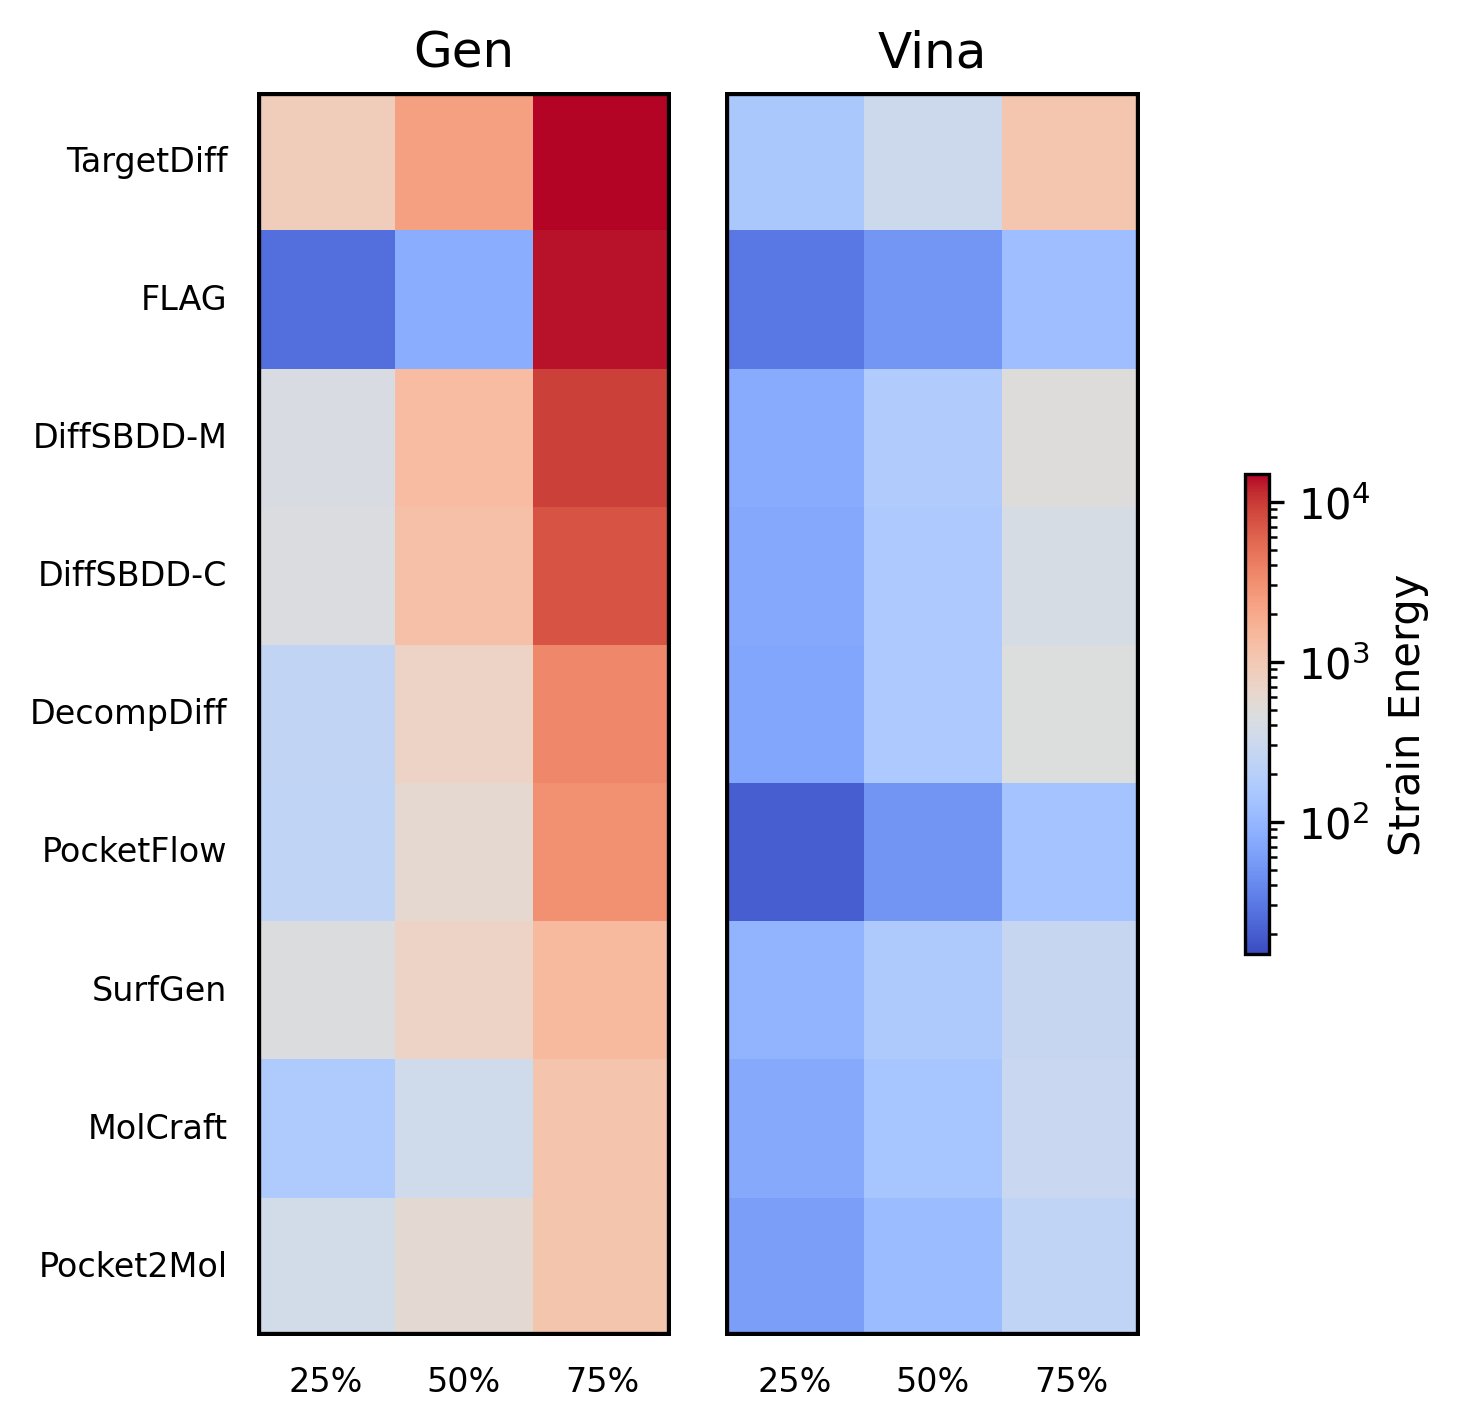

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import LogNorm

result_df = pd.read_csv("./final_plot/Strain/Denovo/strain_unseen_summary.csv")

result_df.sort_values("gen_mean_75", ascending=False, inplace=True)

heatmap_data_gen = []
heatmap_data_vina = []
heatmap_data_all = []

for metric in ["25", "50", "75"]:
    for condition in ["gen_mean", "vina_mean"]:
        col_name = f"{condition}_{metric}"
        values = result_df[col_name].tolist()
        if condition == "gen_mean":
            heatmap_data_gen.append(values)
        elif condition == "vina_mean":
            heatmap_data_vina.append(values)
        heatmap_data_all.append(values)

xticklabels_with_gaps = [
    "25%", "50%", "75%",
]

def add_gaps(heatmap_data):
    heatmap_data_with_gaps = []
    for i in range(0, len(heatmap_data), 3):
        heatmap_data_with_gaps.append(heatmap_data[i])     # 25
        heatmap_data_with_gaps.append(heatmap_data[i+1])   # 50
        heatmap_data_with_gaps.append(heatmap_data[i+2])   # 75
    return np.array(heatmap_data_with_gaps).T 

heatmap_data_gen_with_gaps = add_gaps(heatmap_data_gen)
heatmap_data_vina_with_gaps = add_gaps(heatmap_data_vina)


fig, axes = plt.subplots(1, 2, figsize=(4, 5), dpi=300)

norm = LogNorm(vmin=15, 
               vmax=15000)

# gen
sns.heatmap(
    heatmap_data_gen_with_gaps,
    cmap="coolwarm", 
    xticklabels=xticklabels_with_gaps,
    yticklabels=result_df["Models"],
    cbar=False,  
    square=True,
    ax=axes[0],
    norm=norm
)
axes[0].set_title("Gen")
axes[0].add_patch(
    patches.Rectangle(
        (0, 0), 3, len(result_df), 
        transform=axes[0].transData, 
        color="black", fill=False, linewidth=2 
    )
)

# vina
sns.heatmap(
    heatmap_data_vina_with_gaps,
    cmap="coolwarm", 
    xticklabels=xticklabels_with_gaps,
    yticklabels=[],
    cbar=False, 
    square=True,
    ax=axes[1],
    norm=norm
)
axes[1].set_title("Vina")

axes[1].add_patch(
    patches.Rectangle(
        (0, 0), 3, len(result_df),  
        transform=axes[1].transData, 
        color="black", fill=False, linewidth=2  
    )
)

cbar = fig.colorbar(axes[0].collections[0], ax=axes, orientation='vertical', fraction=0.03, pad=0.08)
cbar.set_label("Strain Energy")

cbar.ax.set_position([1.05, 0.15, 0.02, 0.7])  
for ax in axes:
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params(left=False, bottom=False)


for ax in axes:
    plt.sca(ax)  
    plt.yticks(fontsize=8)  
    plt.xticks(fontsize=8)  

plt.tight_layout()
plt.savefig("./final_plot/output/06-strain_heatmap_denovo_unseen_vina.svg", bbox_inches='tight', format='svg')
plt.show()
